![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)
# <font color='Blue'>Ciência dos Dados na Prática</font>

# <font color='GREEN'> Previsão de Lucro das STARTUPS 
![](https://media.moneytimes.com.br/uploads/2019/08/finding-startups.gif)

![](https://previews.123rf.com/images/wowomnom/wowomnom1608/wowomnom160800094/61326852-vector-creative-illustration-of-business-startup-word-lettering-typography-with-line-icons-and-tag-c.jpg)

![](https://cienciadosdados.com/images/2021/Thumbs/st.png) 


![](http://latinacion.com.br/diario/wp-content/uploads/2018/09/manifesto.gif)


# 1° Qual o Problema de Negócio?

Os Cientistas de Dados do Fundo Pátria Investimentos, foram convocados para Criação de Máquinas Preditivas cujo objetivo inicial é Prever o Lucro das Maiores Startups do mercado, para que o Conselho de Administração do Fundo possa tomar a decisão, baseadas em fatos e dados, sobre o aporte financeiro em investimentos de risco da companhia.

**Fonte de Dados:**

https://www.kaggle.com/farhanmd29/50-startups?select=50_Startups.csv

# 2° Análise Exploratória dos Dados

![](https://publiya285608473.files.wordpress.com/2019/12/gif.gif)

In [ ]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [ ]:
# Importação do Dataset
dataset = pd.read_csv('50_Startups.csv')

In [ ]:
# Visualização das primeiras linhas
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [ ]:
# Visualização das últimas linhas
dataset.tail()

R&D Spend  Administration  Marketing Spend       State    Profit
45    1000.23       124153.04          1903.93    New York  64926.08
46    1315.46       115816.21        297114.46     Florida  49490.75
47       0.00       135426.92             0.00  California  42559.73
48     542.05        51743.15             0.00    New York  35673.41
49       0.00       116983.80         45173.06  California  14681.40

In [ ]:
# Estatística descritiva dos campos numéricos
dataset.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [ ]:
# Shape do Dataset
print('Existem ',dataset.shape[0],'linhas e ',dataset.shape[1],'colunas no dataset.')

Existem  50 linhas e  5 colunas no dataset.


In [ ]:
print('Existem',dataset.duplicated().sum(),'duplicados no dateset.') #using duplicated() pre-defined function

Existem 0 duplicados no dateset.


In [ ]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
c = dataset.corr()
c

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

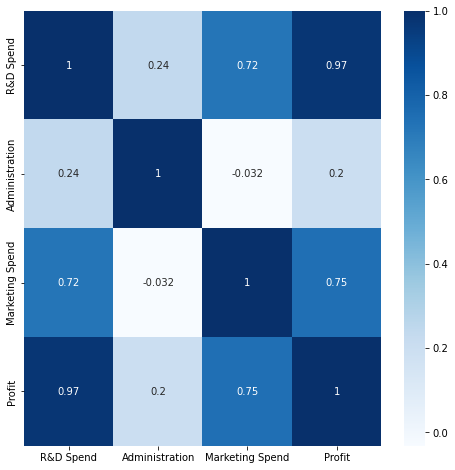

In [ ]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

In [ ]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

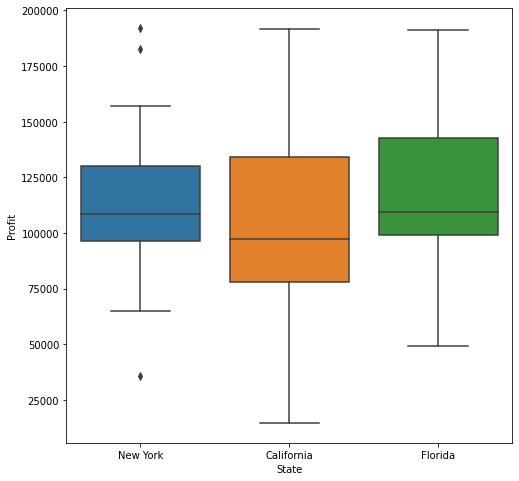

In [ ]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


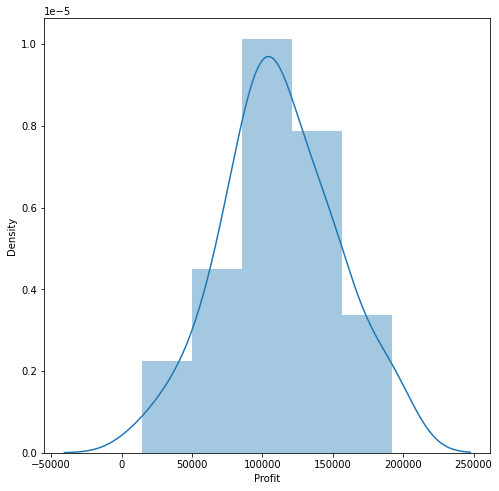

In [ ]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

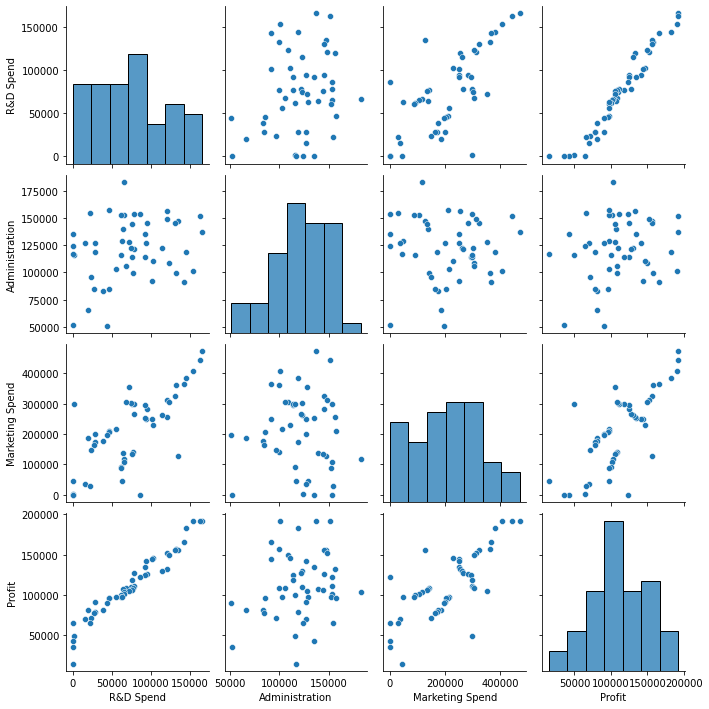

In [ ]:
sns.pairplot(dataset)
plt.show()

# 3° Pré-Processamento dos Dados

In [ ]:
# Separando as variáveis explicativas e o Target (Profit)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [ ]:
# Mapeando a função Labelenconder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Realizando a transformação da variável Cidade em numérica
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

0        1       2  3
0  165349   136898  471784  2
1  162598   151378  443899  0
2  153442   101146  407935  1
3  144372   118672  383200  2
4  142107  91391.8  366168  1

In [ ]:
# Fazendo a Amostragem dos Dados em Traino e Teste
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

#### **Note**: Feature Scaling —  Ou Escalonamento das variáveis - Usar quando as variáveis tiverem escalas diferentes

In [ ]:
#OBS
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)
#y_test = sc_y.fit_transform(y_test)”””

# 4° Construção da Máquina Preditiva

In [ ]:
# Mapeando algoritmos 
from sklearn.linear_model import LinearRegression

# Criando a Máquina Preditiva
MP = LinearRegression()

MP.fit(x_train,y_train)
print('MP has been trained successfully')

MP has been trained successfully


In [ ]:
# Mapeando algoritmos
from xgboost import XGBRegressor
MP = XGBRegressor()
MP.fit(x_train,y_train)
print('Model has been trained successfully')


[17:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model has been trained successfully


In [ ]:
# Mapeando algoritmos
from sklearn.ensemble import GradientBoostingRegressor
MP = GradientBoostingRegressor()
MP.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [ ]:
# Fazendo Predições com dados que a MP nunca viu (x_test) para avaliar sua assertividade
y_pred = MP.predict(x_test)
y_pred

array([101615.84322851, 136195.09261524, 137930.05682006,  82317.05050454,
       181859.68410656, 117225.42977661,  63595.82316013,  98003.54781293,
       118521.12524289, 172777.61522244,  99893.2775842 ,  92295.3136344 ,
       115196.62088981,  92518.48179185, 134546.38569278])

# 5° Avaliação da Máquina Preditiva

In [ ]:
testing_data_model_score = MP.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = MP.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9274499239977365
Model Score/Performance on Training data 0.9999673938258726


In [ ]:
# Criando um dataframe para comparar valores reais e valores preditos pela MP
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

Predicted value  Actual Value
0     101615.843229     103282.38
1     136195.092615     144259.40
2     137930.056820     146121.95
3      82317.050505      77798.83
4     181859.684107     191050.39
5     117225.429777     105008.31
6      63595.823160      81229.06
7      98003.547813      97483.56
8     118521.125243     110352.25
9     172777.615222     166187.94
10     99893.277584      96778.92
11     92295.313634      96479.51
12    115196.620890     105733.54
13     92518.481792      96712.80
14    134546.385693     124266.90

In [ ]:
# Avaliando com outra métrica: R2
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 92.79802608397098


**MAE**: Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive.

In [ ]:
# Avaliando com outra métrica: MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 7199.733157963843


Portanto, o erro absoluto médio é 6790.8077649905845 Portanto, nosso valor previsto pode ser 6790. unidades a mais ou a menos que o valor real.

# **Resumão**
![](https://cdn.dribbble.com/users/497438/screenshots/2710343/cml3dnexttech400300.gif)
 
* Nesta aula, aprendemos a **Criar MP quando temos poucos dados** 
* Usamos Regressores diversos e Aprendemos que a Simplicidade funciona tbm
* Criação de Gráficos Customizados
* Análise Exploratória na Unha 

#Fim

## Valeu!

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="500" height="320" src="https://www.youtube.com/embed/9tAU8fRgq2g" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')